# Titanic Dataset EDA & Classification Model

## Objectives:
- Who had the most chances to survive? 
- What class of people had most number?
- Who paid the most fare and their chances of survival
- Predicting the survival of a person on board, given the specifics.

In [1]:
# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load dataset from local disk or via url
df = pd.read_csv('titanic.csv')

In [3]:
df.head(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.head(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
df.shape

(850, 15)

In [6]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [7]:
# Checking non-null counts and type of dtype features are present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


- 'age','fare','cabin','boat','body'and'home.dest' have null values.
- 'body','boat','home.dest' and 'cabin' have more than 50% null counts. Hence, they'll be removed.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,850.0,662.816471,380.751936,1.0000,332.2500,676.5000,992.25,1307.0000
pclass,850.0,2.320000,0.838530,1.0000,2.0000,3.0000,3.00,3.0000
age,676.0,29.519847,14.562243,0.1667,20.0000,28.0000,37.00,80.0000
sibsp,850.0,0.522353,1.112132,0.0000,0.0000,0.0000,1.00,8.0000
parch,850.0,0.382353,0.879511,0.0000,0.0000,0.0000,0.00,9.0000
fare,849.0,34.012701,53.705779,0.0000,7.8958,14.1083,31.00,512.3292
body,73.0,165.821918,99.068487,4.0000,75.0000,166.0000,260.00,328.0000
survived,850.0,0.368235,0.482610,0.0000,0.0000,0.0000,1.00,1.0000


- Average age of passengers was 29yrs.
- Average fare was 34 Pounds.

In [9]:
del df['body']
del df['boat']
del df['passenger_id']
del df['cabin']
del df['name']
del df['ticket']
del df['home.dest']

In [10]:
df.isnull().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

In [11]:
#filling the null values of numerical features with their arithematic mean(average).
#Null values in categorical features are filled with most repeated category.

df['age'].fillna(df['age'].mean(), inplace = True)
df['fare'].fillna(df['fare'].mean(), inplace = True)
df['embarked'].fillna('S', inplace = True)

In [12]:
df['sex'].value_counts()

male      551
female    299
Name: sex, dtype: int64

## Data Visualization

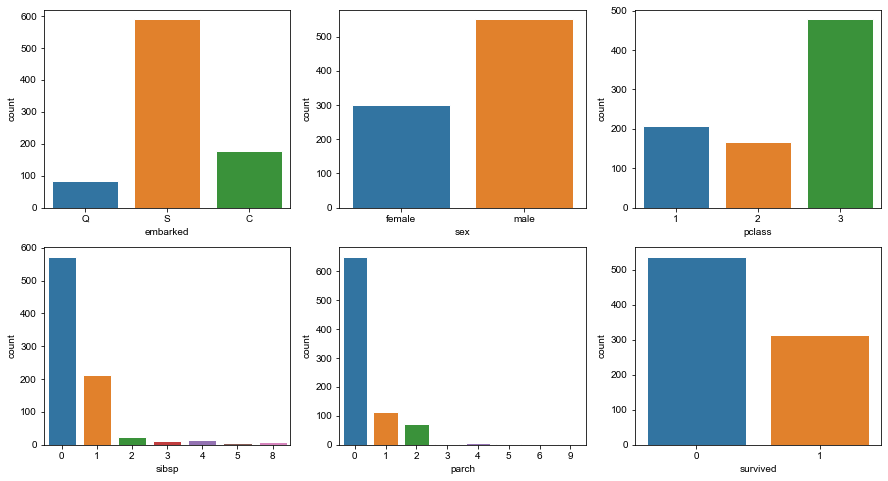

In [13]:
# Count plots using seaborn

fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.set_style('darkgrid')
sns.countplot(ax=axes[0,0], x = df['embarked'], data = df)
sns.countplot(ax=axes[0,1], x = df['sex'], data = df)
sns.countplot(ax=axes[0,2], x = df['pclass'], data = df)
sns.countplot(ax=axes[1,0], x = df['sibsp'], data = df)
sns.countplot(ax=axes[1,1], x = df['parch'], data = df)
sns.countplot(ax=axes[1,2], x = df['survived'], data = df)
plt.show()

In [14]:
df['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

- About 69% passengers boarded at Southampton.
- There were almost twice as males than females on ship.
- Passenger class third had the most number of people and had the least fare.
- Only 37% people could survived the accident.

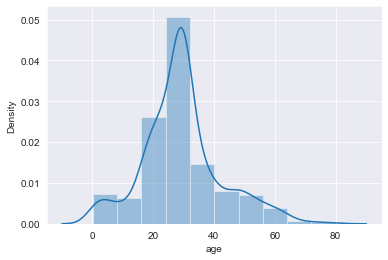

In [15]:
sns.distplot(df['age'], bins =10)
plt.show()

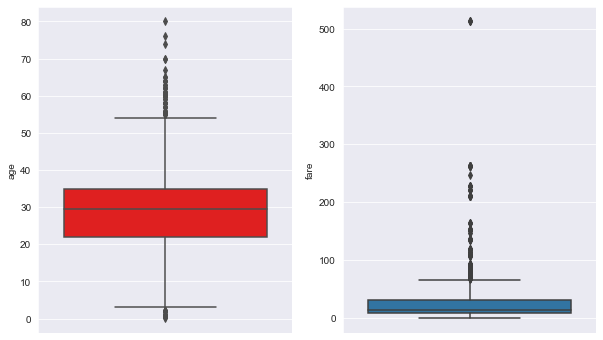

In [16]:
# Box whisker plot

fig, ax = plt.subplots(1,2, figsize= (10,6))
sns.boxplot(ax = ax[0], y = df['age'], data = df, color = 'r')
sns.boxplot(ax = ax[1], y = df['fare'], data = df)
plt.show()

- 'Age' and 'fare both have outliers.
- These will be removed by using Robust Scaler

<AxesSubplot:>

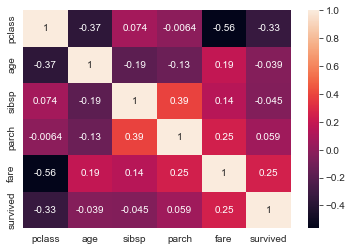

In [17]:
sns.heatmap(df.corr(), annot =True)

Negatively correlated:

- 'age' and 'pclass' (moderately)
- 'fare' and 'pclass' (Highly)
- 'survived' and 'pclass' (moderately)

Positively correlated:

- 'parch' and 'sibsp' (low)
- 'surived' and 'fare' (low)

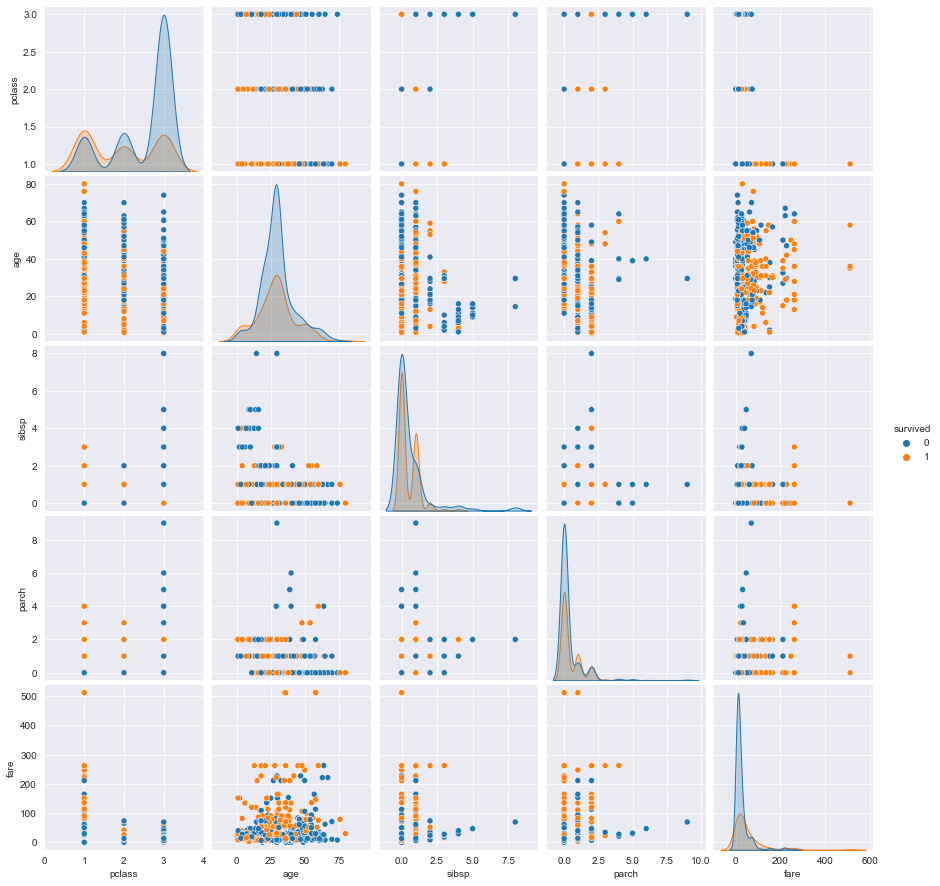

In [18]:
# Pairplots representing people survived or not in different features.
sns.pairplot(df, hue= 'survived' )

- Most people of passenger class 3 couldn't survive.
- Most people of age 35yrs and higher couldn't survive.
- People who paid more fare had higher chances of survial.

In [19]:
# Using One Hot Encoding to change object type features into int type

Pclass = pd.get_dummies(df['pclass'], drop_first = True)
Embarked = pd.get_dummies(df['embarked'], drop_first = True)
Sex = pd.get_dummies(df['sex'], drop_first = True)

In [20]:
# Concating dummy columns with other features

df = pd.concat([df,Pclass,Embarked,Sex], axis = 1)

In [21]:
# Deleting and adding 'survived' column at the end

df['Survived'] = df['survived']
del df['survived']

In [22]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,2,3,Q,S,male,Survived
0,3,female,29.519847,0,0,7.7333,Q,0,1,1,0,0,1
1,3,male,38.000000,0,0,8.6625,S,0,1,0,1,1,0
2,3,female,30.000000,1,1,24.1500,S,0,1,0,1,0,0
3,2,female,54.000000,1,3,23.0000,S,1,0,0,1,0,1
4,2,male,40.000000,0,0,13.0000,S,1,0,0,1,1,0


In [23]:
# Dropping columns which are encoded.
df.drop(['pclass','sex','embarked'], inplace = True, axis = 1)

In [24]:
# using Robust Scaling to remove outliers
trans = RobustScaler()
df = trans.fit_transform(df)

In [25]:
# Scaling the features using MinMax Scaler
X =  df[:,:-1]
y = df[:,-1]
min = MinMaxScaler().fit(X)
x = min.transform(X)

In [26]:
#Spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state =30 )

In [27]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
predict1 = model1.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test,predict1))

Accuracy score:  0.8196078431372549


In [28]:
# Using RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
predict = model.predict(x_test)

_________ Classification Report__________
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       163
         1.0       0.81      0.70      0.75        92

    accuracy                           0.83       255
   macro avg       0.83      0.80      0.81       255
weighted avg       0.83      0.83      0.83       255

 
________ Accuracy Report________
0.8313725490196079
Accuracy=  83.13725490196079
_______ Confusion Matrix_______


<AxesSubplot:>

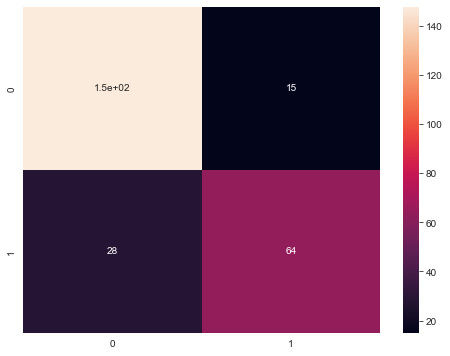

In [29]:
print('_________ Classification Report__________')
print(classification_report(y_test, predict))

print(' ')

print('________ Accuracy Report________')
print(accuracy_score(y_test,predict))
print('Accuracy= ',accuracy_score(y_test,predict)*100)

print('_______ Confusion Matrix_______')
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,predict), annot =True)

Inferences on survival:
- A passenger of age less than 20yrs, traveling in pclass 1 had the most odds of survial.
- In adults, a female traveling in pclass 1, of age less than 30yrs, who had either one child or no child, had the most odds of survival.

In [49]:
model = RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=101, oob_score=True)

model.fit(x_train, y_train)

print(model.oob_score_)

0.8084033613445378


In [52]:
random_initial = RandomForestClassifier(random_state=101, n_jobs=-1)
parameters = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [53]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=random_initial,
                           param_grid=parameters,
                           cv = 10,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)
rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=101)


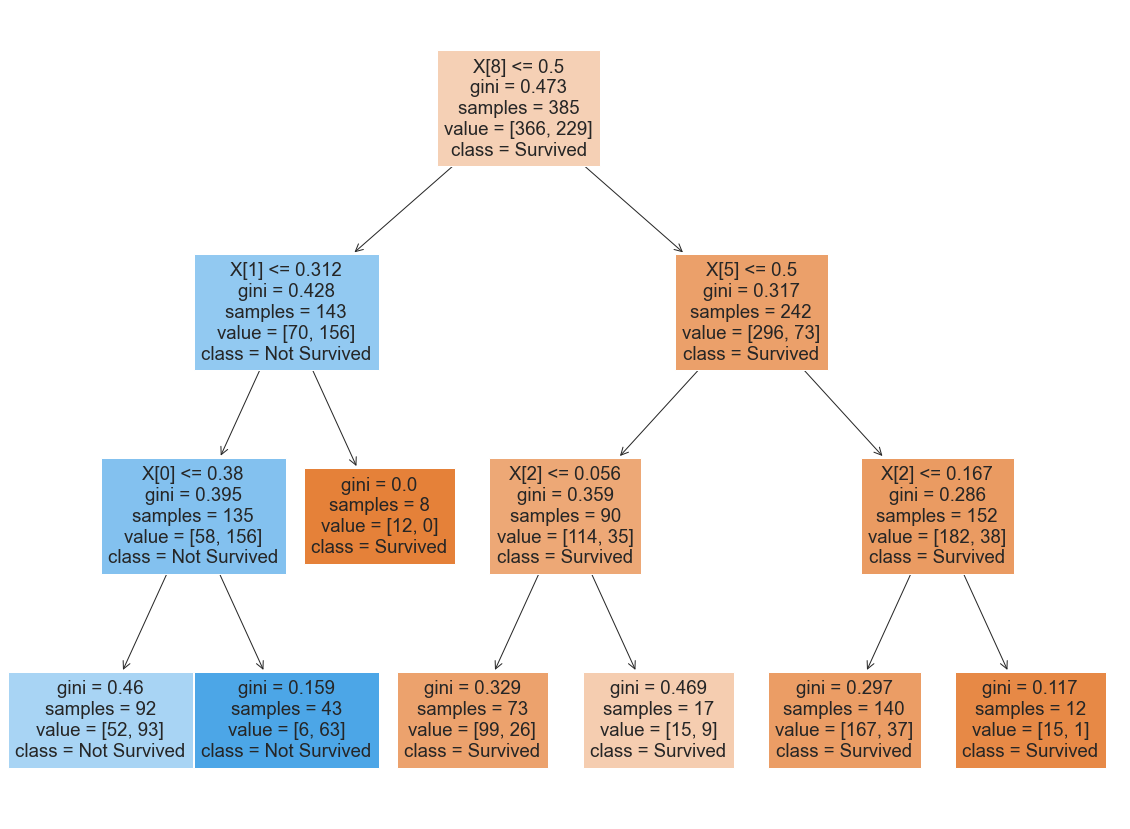

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(rf_best.estimators_[5], class_names=['Survived', "Not Survived"],filled=True)
plt.show()

<Figure size 1080x864 with 0 Axes>

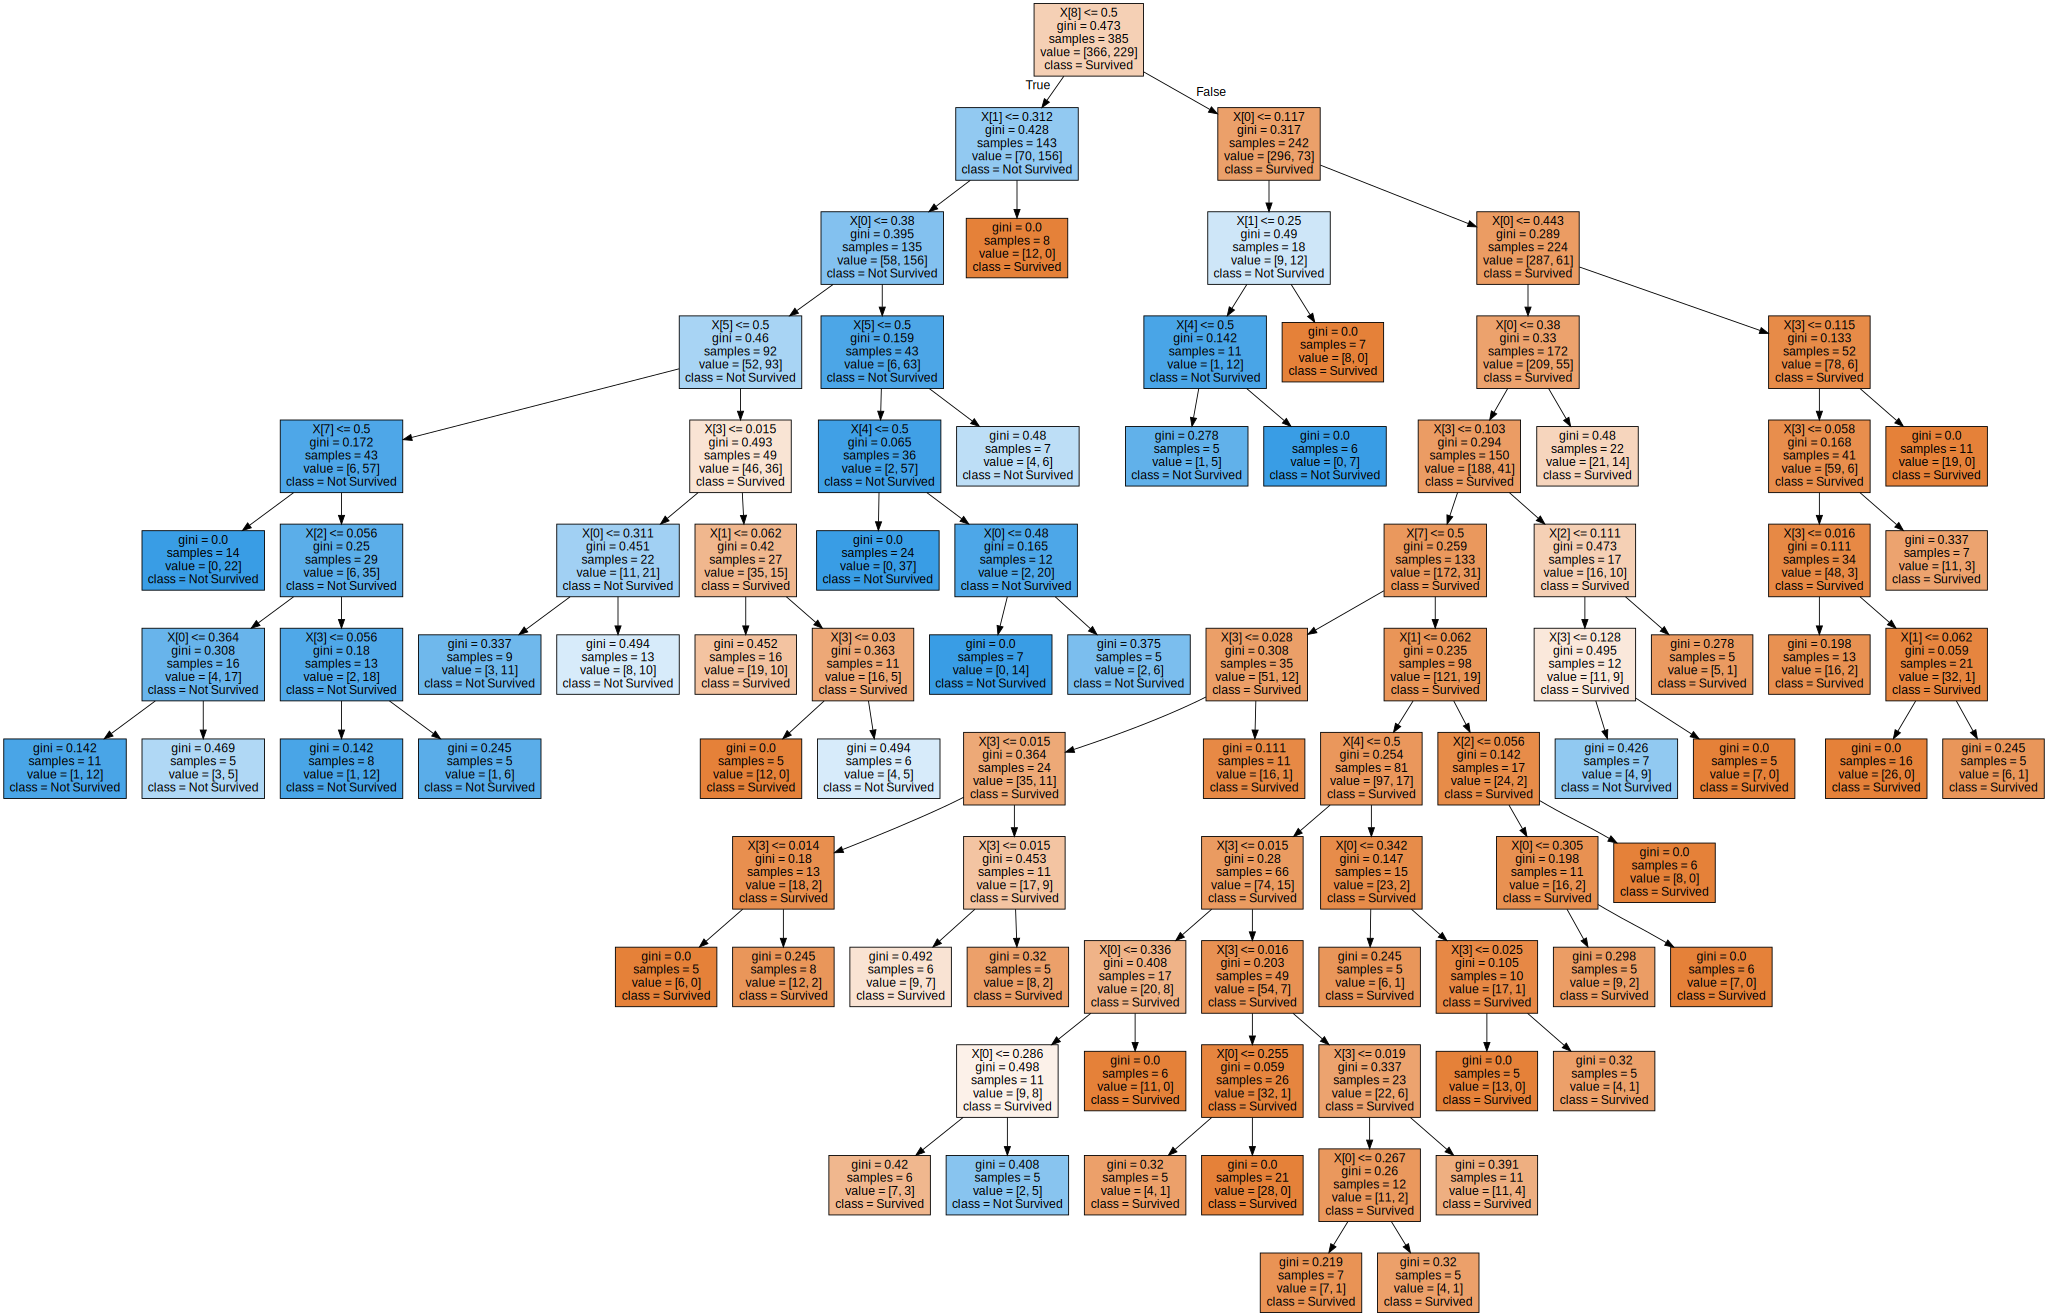

In [46]:
import matplotlib.image as pltimg
from sklearn import tree
from dtreeviz.trees import *
dot_data = tree.export_graphviz(rf_best.estimators_[5], class_names=['Survived', "Not Survived"],filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph